In [3]:
import pandas as pd
brann = pd.read_csv(
"https://raw.githubusercontent.com/holleland/TECH3/refs/heads/main/data/Brann_Recycling.csv"
)
brann.head()


,Match_Number,Opponent,Away_Condition,Gamification_Days,Winner,SortedCup
0,2,Vaalerenga,Baseline,Baseline,Home,1
1,2,Vaalerenga,Baseline,Baseline,Home,0
2,2,Vaalerenga,Baseline,Baseline,Home,0
3,2,Vaalerenga,Baseline,Baseline,Home,0
4,2,Vaalerenga,Baseline,Baseline,Home,0


In [8]:
brann.groupby("Opponent")["SortedCup"].count()

Opponent
Aalesund         104
Bodoe            276
HamKam           182
Lillestroem      236
Molde            228
Odd               63
Rosenborg        289
Sandefjord         8
Sarpsborg         49
Stabaek          138
Stroemsgodset    248
Tromsoe          226
Vaalerenga       276
Viking           349
Name: SortedCup, dtype: int64

In [9]:
brann.groupby("Opponent")["SortedCup"].sum()

Opponent
Aalesund         69
Bodoe            38
HamKam           38
Lillestroem      36
Molde            50
Odd              55
Rosenborg        54
Sandefjord        1
Sarpsborg        31
Stabaek          19
Stroemsgodset    40
Tromsoe          84
Vaalerenga       44
Viking           77
Name: SortedCup, dtype: int64

In [18]:
import pandas as pd

# 1. cups sold per opponent
cups_sold = brann.groupby('Opponent')['SortedCup'].count()

# 2. cups sorted correctly (SortedCup == 1)
cups_sorted = brann.groupby('Opponent')['SortedCup'].sum()

# 3. combine into one table
table = pd.concat([cups_sold, cups_sorted], axis=1)
table.columns = ['cups_sold', 'cups_sorted']

# 4. add relative frequency (sorting rate)
table['sorting_rate'] = table['cups_sorted'] / table['cups_sold']

# 5. show table sorted by best recyclers
table.sort_values('sorting_rate', ascending=False)


,cups_sold,cups_sorted,sorting_rate
Opponent,,,
Odd,63,55,0.873016
Aalesund,104,69,0.663462
Sarpsborg,49,31,0.632653
Tromsoe,226,84,0.371681
Viking,349,77,0.220630
Molde,228,50,0.219298
HamKam,182,38,0.208791
Rosenborg,289,54,0.186851
Stroemsgodset,248,40,0.161290


In [13]:


# compute sorting rate per match
match = brann.groupby(['Match_Number', 'Opponent', 'Away_Condition', 'Gamification_Days'])['SortedCup']

cups_sold = match.count()
cups_sorted = match.sum()

match_table = pd.concat([cups_sold, cups_sorted], axis=1)
match_table.columns = ['cups_sold', 'cups_sorted']
match_table['sorting_rate'] = match_table['cups_sorted'] / match_table['cups_sold']

# now summarize sorting_rate
summary = match_table['sorting_rate'].agg([
    'mean',
    'median',
    'std',
    lambda x: x.quantile(0.25),
    lambda x: x.quantile(0.75),
])

summary.index = ['mean', 'median', 'std', '1st_quartile', '3rd_quartile']
summary


mean            0.303571
median          0.197821
std             0.240843
1st_quartile    0.154262
3rd_quartile    0.333919
Name: sorting_rate, dtype: float64

In [16]:
team = brann.groupby('Opponent')['SortedCup']
cups_sold = team.count()
cups_sorted = team.sum()

rate = cups_sorted / cups_sold


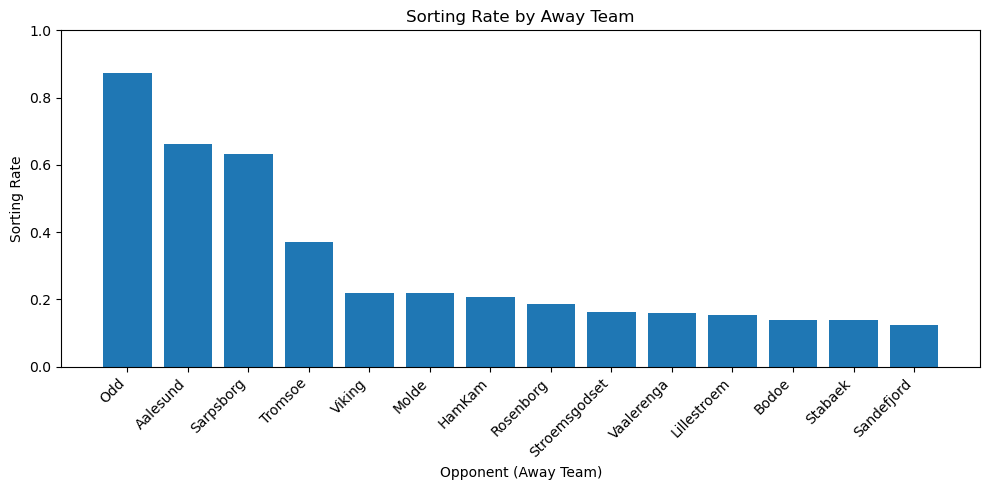

In [27]:
import matplotlib.pyplot as plt

rate_sorted = rate.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(rate_sorted.index, rate_sorted.values)
plt.ylabel('Sorting Rate')
plt.xlabel('Opponent (Away Team)')
plt.title('Sorting Rate by Away Team')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)  # because it's a rate between 0 and 1
plt.tight_layout()
plt.show()

In [28]:
match = brann.groupby(['Match_Number', 'Away_Condition', 'Gamification_Days'])['SortedCup']

cups_sold = match.count()
cups_sorted = match.sum()

match_table = pd.concat([cups_sold, cups_sorted], axis=1)
match_table.columns = ['cups_sold', 'cups_sorted']
match_table['sorting_rate'] = match_table['cups_sorted'] / match_table['cups_sold']


In [ ]:
away_summary = match_table.groupby('Away_Condition')['sorting_rate'].agg(['mean', 'std'])

game_summary = match_table.groupby('Gamification_Days')['sorting_rate'].agg(['mean', 'std'])


,mean,median,std,min,max,q1,q3
Away_Condition,,,,,,,
Baseline,0.142210,0.142210,0.024339,0.125000,0.159420,0.133605,0.150815
Ingroup,0.393279,0.266486,0.310070,0.137681,0.873016,0.154729,0.590517
Outgroup,0.267651,0.214045,0.181472,0.137681,0.632653,0.192336,0.220297


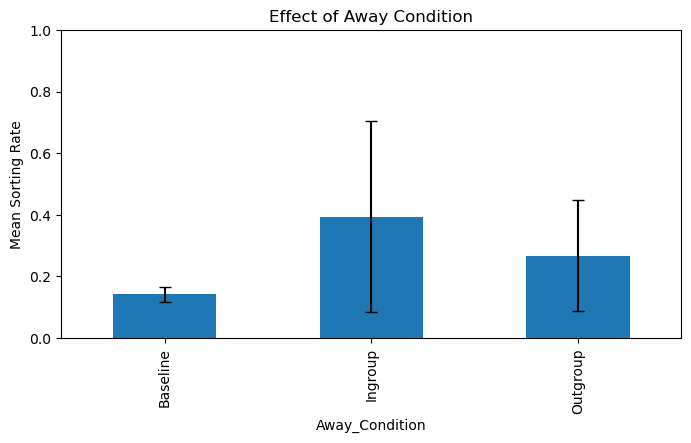

NameError: name 'game_summary' is not defined

<Figure size 800x400 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt



plt.figure(figsize=(8,4))
away_summary['mean'].plot(kind='bar', yerr=away_summary['std'], capsize=4)
plt.ylabel('Mean Sorting Rate')
plt.title('Effect of Away Condition')
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(8,4))
game_summary['mean'].plot(kind='bar', yerr=game_summary['std'], capsize=4)
plt.ylabel('Mean Sorting Rate')
plt.title('Effect of Gamification')
plt.ylim(0,1)
plt.show()


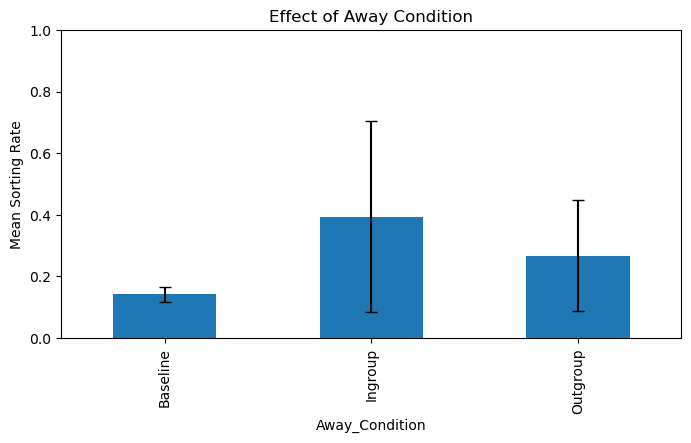

NameError: name 'game_summary' is not defined

<Figure size 800x400 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,4))
away_summary['mean'].plot(kind='bar', yerr=away_summary['std'], capsize=4)
plt.ylabel('Mean Sorting Rate')
plt.title('Effect of Away Condition')
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(8,4))
away_summary['mean'].plot(kind='bar', yerr=game_summary['std'], capsize=4)
plt.ylabel('Mean Sorting Rate')
plt.title('Effect of Gamification')
plt.ylim(0,1)
plt.show()
